In [1]:
## Import necessary packages
# %matplotlib osx 
# %matplotlib qt
# %matplotlib notebook
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Mendelbrot Helper Functions

In [4]:
def Mandelbrot(z, C):
    zNew = z**2 + C
    return zNew

def f(C, z0, nMax):
    zLimit = 50
    z = z0
    for n in range(nMax):
        z = Mandelbrot(z, C)
        if abs(z) > 50:
            return n
    return nMax
            

# Border Detecting Function (for later experiment)

In [29]:
def is_border(C, x, y, threshold):
    coords = np.array([x, y])

    d = np.array([0, -1])
    u = np.array([0, 1])
    r = np.array([1, 0])
    l = np.array([-1, 0])
    lu = l + u
    ru = r + u
    ld = l + d
    rd = r + d

    if C[y, x] >= threshold:
        return False
    for direction in [l, r, u, d, lu, ru, ld, rd]:
        new_x, new_y = coords + direction
        if new_y < 0 or new_y >= C.shape[0] or new_x < 0 or new_x >= C.shape[1]:
            continue
        if C[new_y, new_x] >= threshold:
            return True
    return False

def get_borders(C, threshold):
    borders = []
    Ny = C.shape[0]
    Nx = C.shape[1]
    for y in range(Ny):
        for x in range(Nx):
            if is_border(C, x, y, threshold):
                borders.append(np.array([x, y]))
    return np.array(borders)



# Fractal Animation Function

In [31]:
def create_fractal_animation(resolution, iterations, xPos, yPos, lengthBegin, lengthEnd, zMin, zMax, C, fileName, inverse = False, border_threshold = 0):
    N = resolution
    A = np.zeros((N, N))
    nMax = 75
    from matplotlib.animation import FFMpegWriter
    metadata = dict(title='Experiment 1', artist='Benedict Taguinod')
    writer = FFMpegWriter(fps=15,bitrate=200000)

    fig = plt.figure(dpi=200)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    ax2.elev = 75 
    X = np.linspace(0, N - 1, N)
    Y = np.linspace(0, N - 1, N)
    X, Y = np.meshgrid(X, Y)

    with writer.saving(fig, fileName, dpi=200):
        for i, length in enumerate(np.geomspace(lengthEnd, lengthBegin, iterations)[::-1]):
            if i % 10 == 0:
                print(i, end='')
            else:
                print('.',end='')
            xMin = xPos - length/2
            xMax = xPos + length/2
            xInterval = (xMax - xMin) / N
            xRange = np.arange(xMin, xMax, xInterval)
            yMin = yPos - length/2
            yMax = yPos + length/2
            yInterval = (yMax - yMin) / N
            yRange = np.arange(yMin, yMax, yInterval)
            for x in range(N):
                for y in range(N):
                    z0 = xRange[x] + yRange[y]*1j
                    n = f(C, z0, nMax)
                    A[y, x] = n
                    if border_threshold > 0 and A[y, x] < border_threshold:
                        A[y, x] = None
            if border_threshold > 0:
                borders = get_borders(A, border_threshold)

                for x in range(N):
                    for y in range(N):
                        if A[y, x] < border_threshold:
                            A[y, x] = None
                A -= border_threshold
                for border in borders:
                    A[border[1], border[0]] = 0

            ax1.clear()
            ax1.imshow(A, interpolation='nearest', cmap='magma')

            ax2.clear()
            ax2.set_zlim(zMin, zMax)
            ax2.azim = (i + 45) % 360
            cmap = 'magma'
            if inverse:
                A *= -1
                cmap = 'magma_r'
            surf = ax2.plot_surface(
                X, 
                Y, 
                A, 
                cmap=cmap, 
                linewidth=1, 
                antialiased=False
            )

            plt.pause(0.01)
            writer.grab_frame()

# Generating Fractal for Experiment

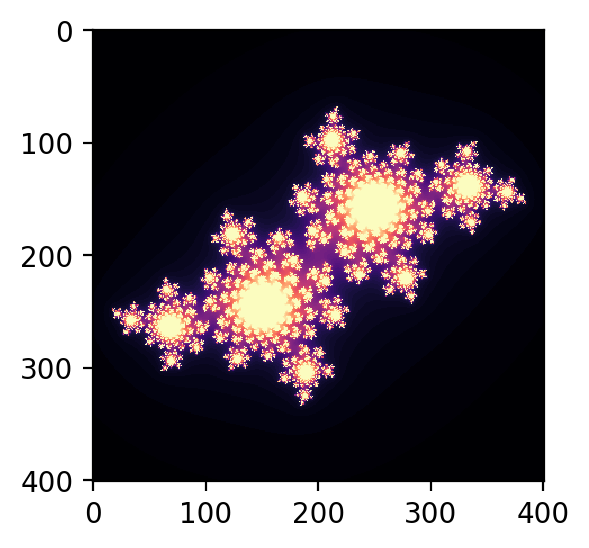

In [20]:
resolution = 401

N = resolution
xPos = 0
yPos = 0
length = 3

A = np.zeros((N, N))

C = -0.4+0.6j

xMin = xPos - length/2
xMax = xPos + length/2
xInterval = (xMax - xMin) / N
xRange = np.arange(xMin, xMax, xInterval)
yMin = yPos - length/2
yMax = yPos + length/2
yInterval = (yMax - yMin) / N
yRange = np.arange(yMin, yMax, yInterval)

nMax = 75
for x in range(N):
    for y in range(N):
        z0 = xRange[x] + yRange[y]*1j
        n = f(C, z0, nMax)
        A[y, x] = n

fig = plt.figure(dpi=200)
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(A, interpolation='nearest', cmap='magma')

# Experiment 1 : Zooming into the middle

0

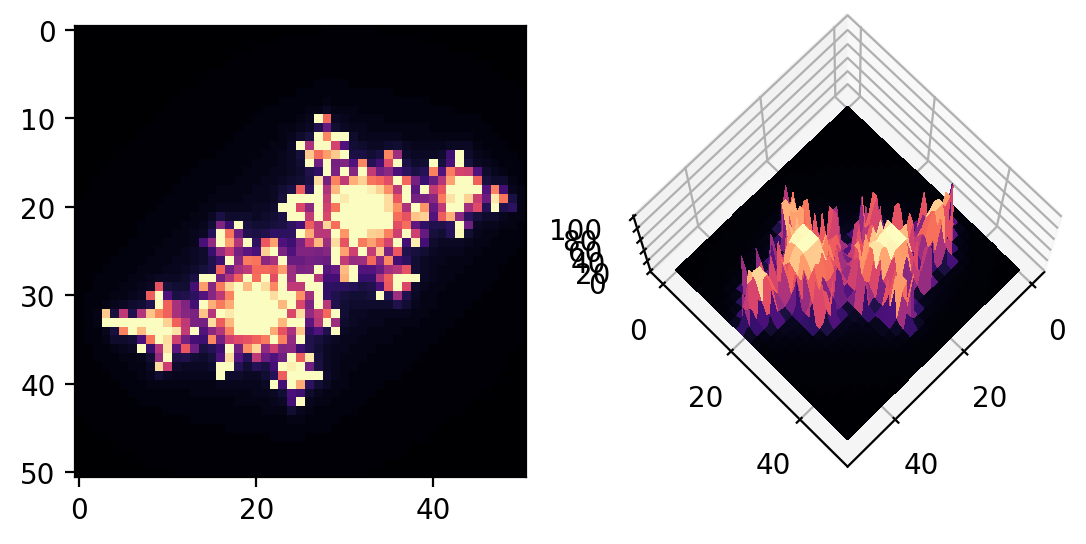

.........10.........20.........30.........40.........50.........60.........70.........80.........90.........

In [19]:
resolution = 51
iterations = 100

N = resolution
xPos = -0.036498
yPos = -0.031216
lengthEnd = 0.00001
lengthBegin = 3

zMin = 0
zMax = 100

fileName = "animation1.mp4"

C = -0.4+0.6j

create_fractal_animation(
    resolution=resolution, 
    iterations=iterations, 
    xPos=xPos, 
    yPos=yPos, 
    lengthBegin=lengthBegin, 
    lengthEnd=lengthEnd, 
    zMin=zMin, 
    zMax=zMax, 
    C=C, 
    fileName=fileName
)


# Experiment 2: More Resolution

0

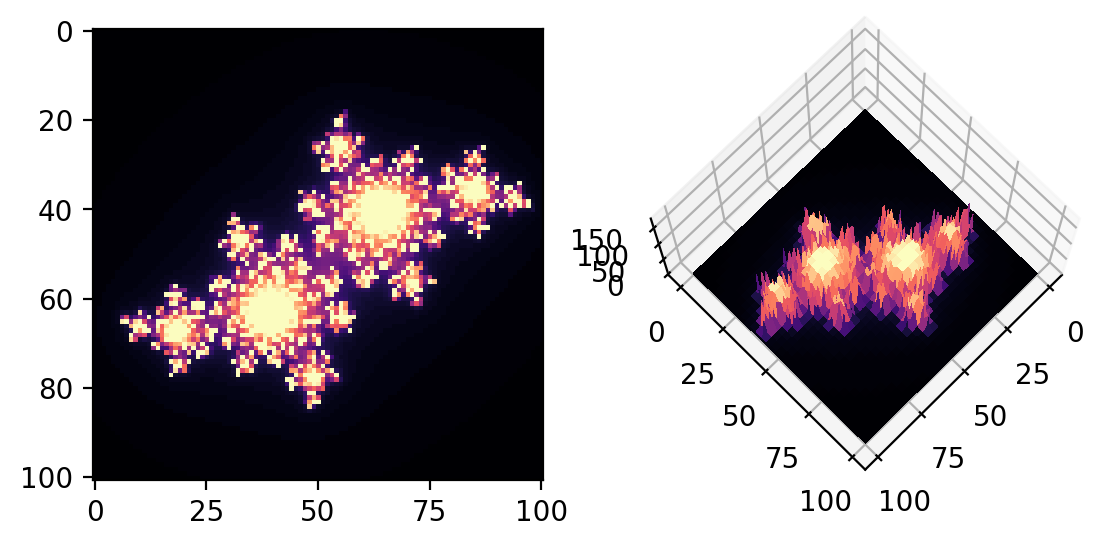

.........10.........20.........30.........40.........50.........60.........70.........80.........90.........

In [5]:
resolution = 101
iterations = 100

N = resolution
xPos = -0.036498
yPos = -0.031216
lengthEnd = 0.00001
lengthBegin = 3

zMin = 0
zMax = 175

fileName = "animation2.mp4"

C = -0.4+0.6j

create_fractal_animation(
    resolution=resolution, 
    iterations=iterations, 
    xPos=xPos, 
    yPos=yPos, 
    lengthBegin=lengthBegin, 
    lengthEnd=lengthEnd, 
    zMin=zMin, 
    zMax=zMax, 
    C=C, 
    fileName=fileName
)


# Experiment 3: Even More Resolution

0

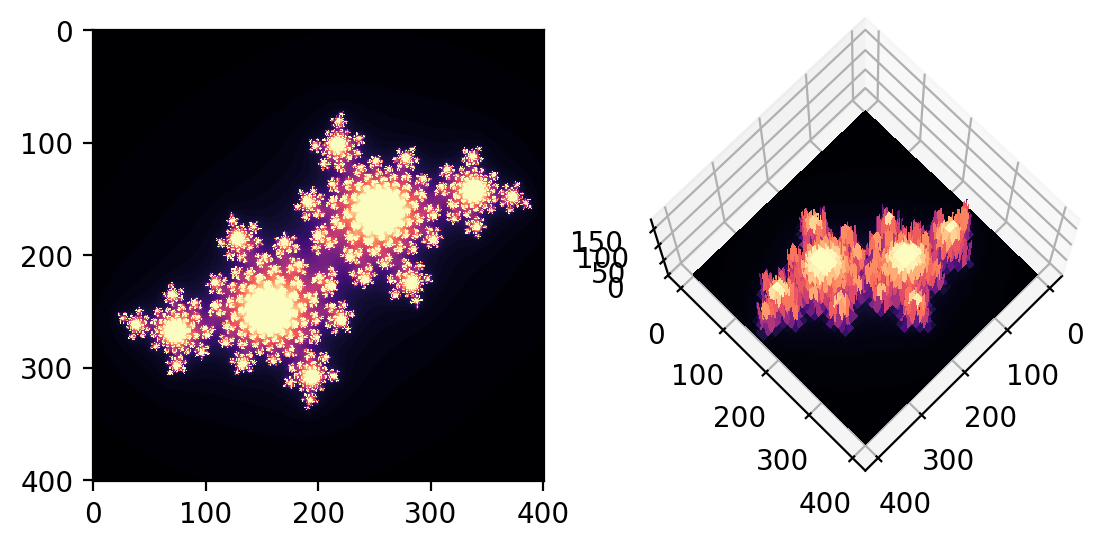

.........10.........20.........30.........40.........50.........60.........70.........80.........90.........

In [34]:
resolution = 401
iterations = 100

N = resolution
xPos = -0.036498
yPos = -0.031216
lengthEnd = 0.00001
lengthBegin = 3

zMin = 0
zMax = 175

fileName = "animation3.mp4"

C = -0.4+0.6j

create_fractal_animation(
    resolution=resolution, 
    iterations=iterations, 
    xPos=xPos, 
    yPos=yPos, 
    lengthBegin=lengthBegin, 
    lengthEnd=lengthEnd, 
    zMin=zMin, 
    zMax=zMax, 
    C=C, 
    fileName=fileName
)


# Experiment 4: Inverted Z

0

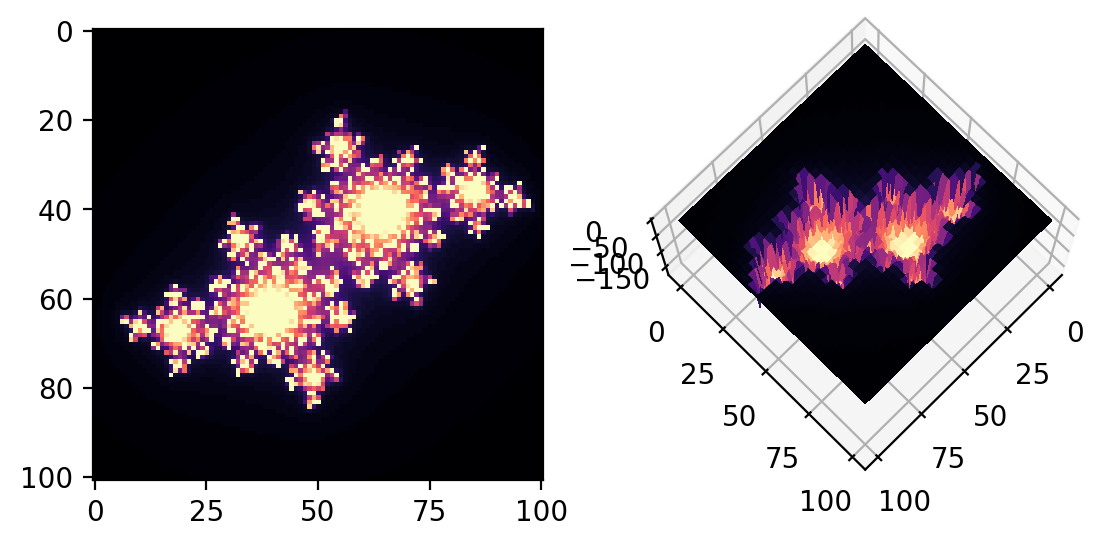

.........10.........20.........30.........40.........50.........60.........70.........80.........90.........

In [169]:
resolution = 101
iterations = 100

N = resolution
xPos = -0.036498
yPos = -0.031216
lengthEnd = 0.00001
lengthBegin = 3

zMin = -175
zMax = 0

fileName = "animation4.mp4"

C = -0.4+0.6j

create_fractal_animation(
    resolution=resolution, 
    iterations=iterations, 
    xPos=xPos, 
    yPos=yPos, 
    lengthBegin=lengthBegin, 
    lengthEnd=lengthEnd, 
    zMin=zMin, 
    zMax=zMax, 
    C=C, 
    fileName=fileName,
    inverse=True
)


# Experiment 5: Removing Borders

0

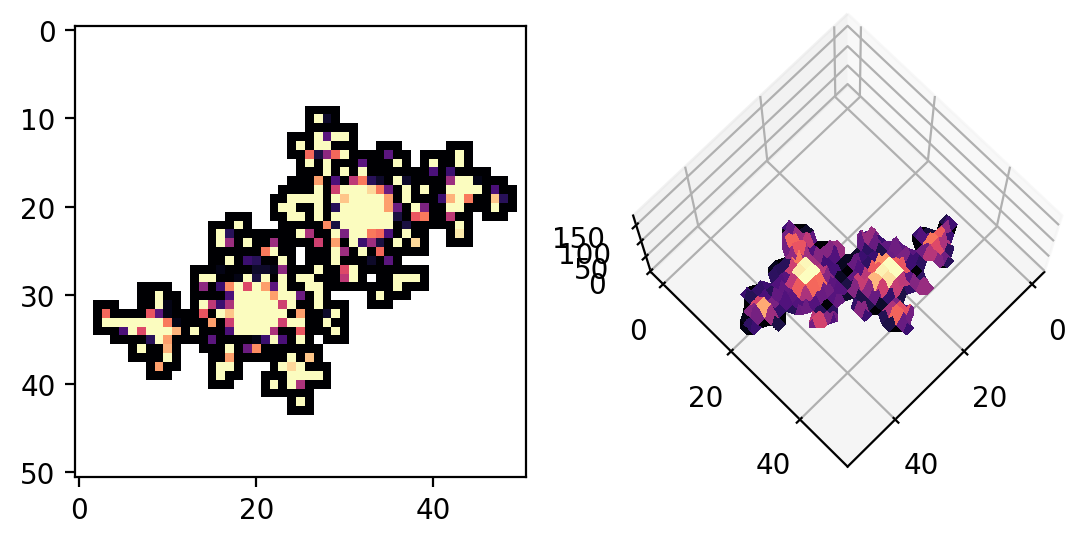

.........10.........20.........30.........40.........50.........60.........70.........80.........90.........

In [150]:
resolution = 51
iterations = 100

N = resolution
xPos = -0.036498
yPos = -0.031216
lengthEnd = 0.00001
lengthBegin = 3

zMin = 0
zMax = 175

fileName = "animation5.mp4"

C = -0.4+0.6j

border_threshold = 50

create_fractal_animation(
    resolution=resolution, 
    iterations=iterations, 
    xPos=xPos, 
    yPos=yPos, 
    lengthBegin=lengthBegin, 
    lengthEnd=lengthEnd, 
    zMin=zMin, 
    zMax=zMax, 
    C=C, 
    fileName=fileName,
    border_threshold=border_threshold
)


# Experiment 6: Putting More Graphics in Zoom Location

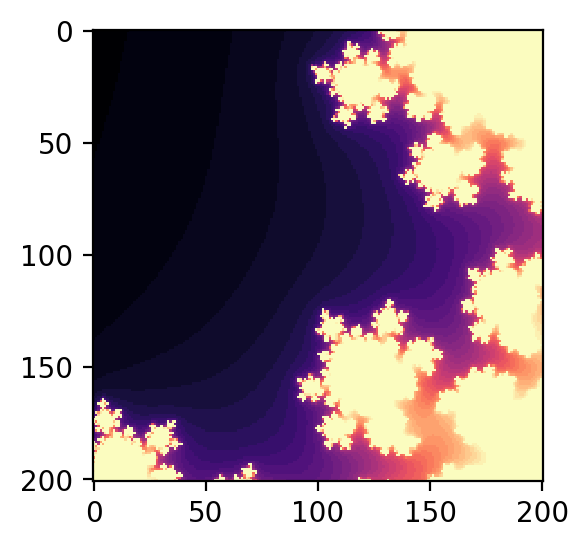

In [164]:
resolution = 201

N = resolution
xPos = 0.040594
yPos = -0.0698
length = .00001

A = np.zeros((N, N))

C = -0.4+0.6j

xMin = xPos - length/2
xMax = xPos + length/2
xInterval = (xMax - xMin) / N
xRange = np.arange(xMin, xMax, xInterval)
yMin = yPos - length/2
yMax = yPos + length/2
yInterval = (yMax - yMin) / N
yRange = np.arange(yMin, yMax, yInterval)

nMax = 75
for x in range(N):
    for y in range(N):
        z0 = xRange[x] + yRange[y]*1j
        n = f(C, z0, nMax)
        A[y, x] = n

fig = plt.figure(dpi=200)
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(A, interpolation='nearest', cmap='magma')



0

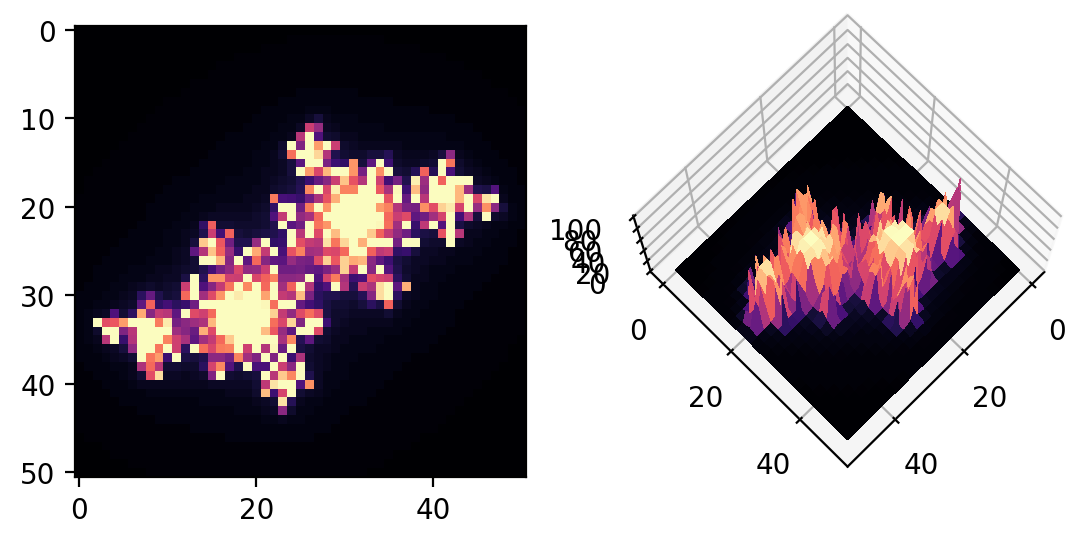

.........10.........20.........30.........40.........50.........60.........70.........80.........90.........

In [167]:
resolution = 51
iterations = 100

N = resolution
xPos = 0.040594
yPos = -0.0698
lengthEnd = 0.00001
lengthBegin = 3

zMin = 0
zMax = 100

fileName = "animation6.mp4"

C = -0.4+0.6j

create_fractal_animation(
    resolution=resolution, 
    iterations=iterations, 
    xPos=xPos, 
    yPos=yPos, 
    lengthBegin=lengthBegin, 
    lengthEnd=lengthEnd, 
    zMin=zMin, 
    zMax=zMax, 
    C=C, 
    fileName=fileName,
)


# Experiment 7: A Bit of Everything!

0

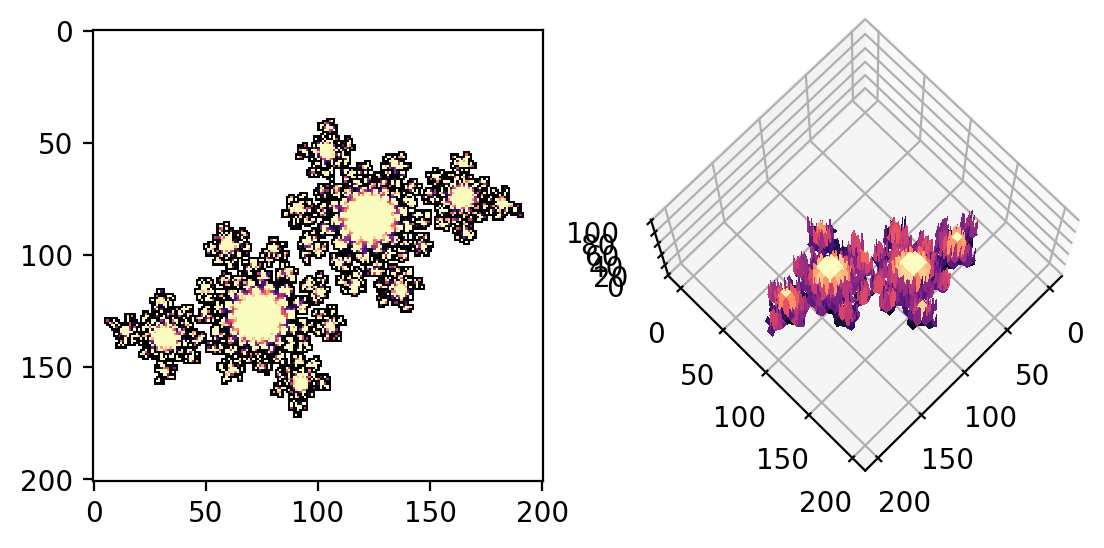

.........10.........20.........30.........40.........50.........60.........70.........80.........90.........

In [171]:
resolution = 201
iterations = 100

N = resolution
xPos = 0.040594
yPos = -0.0698
lengthEnd = 0.00001
lengthBegin = 3

zMin = 0
zMax = 100

fileName = "animation7.mp4"

C = -0.4+0.6j

border_threshold = 50

create_fractal_animation(
    resolution=resolution, 
    iterations=iterations, 
    xPos=xPos, 
    yPos=yPos, 
    lengthBegin=lengthBegin, 
    lengthEnd=lengthEnd, 
    zMin=zMin, 
    zMax=zMax, 
    C=C, 
    fileName=fileName,
    border_threshold=border_threshold
)


In [ ]:
#